# Demonstration of various configurations of the universe

Chosen method: <b><i> Method 2</i></b>

Imports and variables:

In [10]:
import numpy as np
import matplotlib.pyplot as plt

TAU = np.pi*2
chords_to_draw = 10000

# size of the 'universe'
r = 100

Define necessary methods:

In [11]:
# Returns Boolean
def intersects(line,circles):
    x1,x2 = line[0][0], line[1][0]
    y1,y2 = line[0][1], line[1][1]
    
    for circle in circles:
        center = circle.center
        radius = circle.radius

        gradient = (y2-y1)/(x2-x1)
        intercept = y2-(gradient*x2)
        
        # equation for closest approach to a point (circle center) given a line equation
        distance = (np.abs(gradient*center[0] - center[1] + intercept))/(np.sqrt(gradient**2 + 1))
        
        if distance <= radius:
            # first time it detects an intersect, exit the loop as the chord is invalid
            return True
    
    # if no intersect is detected
    return False

In [12]:
# Returns Boolean
def draw_chord(p1,p2,c1,thickness):
    x1,x2 = p1[0], p2[0]
    y1,y2 = p1[1], p2[1]

    if intersects((p1,p2), c1):
        plt.plot([x1,x2],[y1,y2],'red',linewidth=thickness)
        return True
    else:
        plt.plot([x1,x2],[y1,y2],'green',linewidth=thickness)
        return False

In [13]:
# Return pair of floats

def get_coords(r,theta):
    return r * np.cos(theta), r * np.sin(theta)

def get_chord(x,y,r,angle):
    chord_length = np.sqrt(r**2 - (np.sqrt(x**2 + y**2))**2)
    p1 = x + chord_length * np.cos(angle), y + chord_length * np.sin(angle)
    p2 = x - chord_length * np.cos(angle), y - chord_length * np.sin(angle)

    return p1,p2

Generate random chords:

In [14]:
chords = []

for i in range(chords_to_draw):
    # generate random radius angle
    angle = np.random.uniform() * TAU
    x, y = get_coords(r,angle)

    # subtract 90 degrees (pi/2) to get perpendicular
    angle_perp = angle - np.pi/2
    x_perp, y_perp = get_coords(r, angle_perp)

    # choose a random radius length
    r_length = np.random.uniform() * r
    x, y = get_coords(r_length, angle)
    midpoint = (x,y)

    # generates chord perpendicular to end of partial radius
    p1, p2 = get_chord(x,y,r,angle_perp)

    chords.append((p1,p2))

Define body/bodies within universe:

In [15]:
bodies = []
body1 = ((0,50),10)
body2 = ((0,-50),10)

In [16]:
universe = plt.Circle((0,0), r, color='black', fill=False)
body_1 = plt.Circle(body1[0],body1[1], color='blue', fill=False)
body_2 = plt.Circle(body2[0],body2[1],color='blue',fill=False)

bodies.append(body_1)
bodies.append(body_2)

Plot:

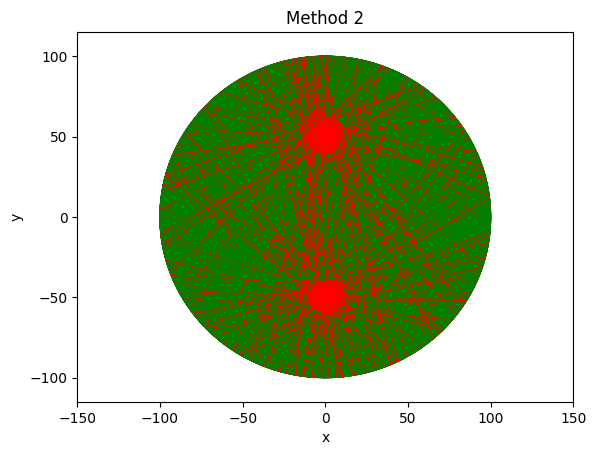

In [17]:
fig, ax = plt.subplots()
#ax.grid()
ax.set_xlabel('x'), ax.set_ylabel('y')
ax.set_title("Method 2")
ax.set_xlim((-r - 0.5*r, r + 0.5*r)), ax.set_ylim((-r - 0.15*r, r + 0.15*r))
ax.add_artist(universe)
for body in bodies:
    ax.add_artist(body)

total = chords_to_draw

for i in range(len(chords)):
    if draw_chord(chords[i][0],chords[i][1],bodies,0.6):
        total -= 1

In [18]:
valid = str(total)
invalid = str(chords_to_draw-total)

print(valid + " valid chords\n" + invalid + " invalid chords\n")

s = str(np.log(total))
s_normalised = str(np.log(total/chords_to_draw))

print(s + " is the entropy without normalisation\n" + s_normalised + " is the entropy with normalisation")

8002 valid chords
1998 invalid chords

8.98744678941718 is the entropy without normalisation
-0.22289358255900238 is the entropy with normalisation
